In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/ethanhall/Desktop/Data/ncaam-march-mania-2021/matchupTestTrain.csv')
df.head()

,WinLoss,TeamID,TeamName,Description,PowerFive,GP,PF,PA,FGPct,FGM,...,OppStl,OppBlk,OppDII,OppHAS,OppLEF,OppMAS,OppMOR,OppPOM,OppSAG,OppWIL
0,1,1101,Abilene Chr,Southland Conference,0,6,67.500000,60.166667,44.409938,23.833333,...,6.222222,3.444444,308,338,298,322,246,301,310,304
1,1,1101,Abilene Chr,Southland Conference,0,7,69.714286,60.857143,44.245524,24.714286,...,5.375000,3.625000,352,352,348,343,321,350,343,351
2,1,1101,Abilene Chr,Southland Conference,0,8,69.250000,61.125000,43.859649,25.000000,...,5.636364,2.909091,335,324,336,310,248,328,324,339
3,1,1101,Abilene Chr,Southland Conference,0,9,70.000000,59.000000,43.921569,24.888889,...,4.583333,2.166667,295,230,277,246,234,247,273,299
4,1,1101,Abilene Chr,Southland Conference,0,11,70.909091,59.363636,44.251969,25.545455,...,9.000000,3.125000,267,174,142,173,224,158,162,114


In [3]:
df.drop(['TeamID',
         'TeamName',
         'Description', 
         'OppTeamID',
         'OppTeamName',
         'OppDescription'], 
        axis=1, 
        inplace=True
       )
df.head()

,WinLoss,PowerFive,GP,PF,PA,FGPct,FGM,FGA,FG3Pct,FGM3,...,OppStl,OppBlk,OppDII,OppHAS,OppLEF,OppMAS,OppMOR,OppPOM,OppSAG,OppWIL
0,1,0,6,67.500000,60.166667,44.409938,23.833333,53.666667,39.639640,7.333333,...,6.222222,3.444444,308,338,298,322,246,301,310,304
1,1,0,7,69.714286,60.857143,44.245524,24.714286,55.857143,40.458015,7.571429,...,5.375000,3.625000,352,352,348,343,321,350,343,351
2,1,0,8,69.250000,61.125000,43.859649,25.000000,57.000000,36.601307,7.000000,...,5.636364,2.909091,335,324,336,310,248,328,324,339
3,1,0,9,70.000000,59.000000,43.921569,24.888889,56.666667,36.723164,7.222222,...,4.583333,2.166667,295,230,277,246,234,247,273,299
4,1,0,11,70.909091,59.363636,44.251969,25.545455,57.727273,35.242291,7.272727,...,9.000000,3.125000,267,174,142,173,224,158,162,114


In [4]:
# df.dtypes
df.columns

Index(['WinLoss', 'PowerFive', 'GP', 'PF', 'PA', 'FGPct', 'FGM', 'FGA',
       'FG3Pct', 'FGM3', 'FGA3', 'FTPct', 'FTM', 'FTA', 'Reb', 'OReb', 'DReb',
       'Ast', 'TO', 'Stl', 'Blk', 'DII', 'HAS', 'LEF', 'MAS', 'MOR', 'POM',
       'SAG', 'WIL', 'OppPowerFive', 'OppGP', 'OppPF', 'OppPA', 'OppFGPct',
       'OppFGM', 'OppFGA', 'OppFG3Pct', 'OppFGM3', 'OppFGA3', 'OppFTPct',
       'OppFTM', 'OppFTA', 'OppReb', 'OppOReb', 'OppDReb', 'OppAst', 'OppTO',
       'OppStl', 'OppBlk', 'OppDII', 'OppHAS', 'OppLEF', 'OppMAS', 'OppMOR',
       'OppPOM', 'OppSAG', 'OppWIL'],
      dtype='object')

In [6]:
def confusion_metrics(conf_matrix):
# save confusion matrix and slice into four pieces
    TN = conf_matrix['Predicted Positive'][1]
    TP = conf_matrix['Predicted Negative'][0]
    FP = conf_matrix['Predicted Positive'][0]
    FN = conf_matrix['Predicted Negative'][1]
    
    # calculate accuracy
    conf_accuracy = (float(TP+TN) / float(TP + TN + FP + FN))
    # calculate mis-classification
    conf_misclassification = 1 - conf_accuracy
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))

    print(f'Accuracy: {round(conf_accuracy,4)}') 
    print(f'Sensitivity: {round(conf_sensitivity,4)}') 
    print(f'Specificity: {round(conf_specificity,4)}')

In [7]:
X = df.drop('WinLoss',axis=1)
y = df['WinLoss']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3, test_size = 0.2)


y_train.value_counts()

1    2659
0    2605
Name: WinLoss, dtype: int64

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5264, 56)
(1316, 56)
(5264,)
(1316,)


## Initial Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


logreg = LogisticRegression(random_state=0, max_iter=10000)
logreg.fit(X_train, y_train)

logreg_pred = logreg.predict(X_test)
print(confusion_matrix(y_test,logreg_pred))
logreg_cm = pd.DataFrame(confusion_matrix(y_test,logreg_pred),
                     columns = ['Predicted Negative', 'Predicted Positive'],
                     index = ['Actual Negative', 'Actual Positive'])

confusion_metrics(logreg_cm)

[[460 225]
 [206 425]]
Accuracy: 0.6725
Sensitivity: 0.6907
Specificity: 0.6538


## My Chosen Features (MCF)

In [45]:
myChosenFeatures = [
    'WinLoss',
    'PowerFive',
#     'GP',
    'PF',
    'PA',
#     'FGPct',
#     'FGM',
#     'FGA',
    'FG3Pct',
#     'FGM3',
#     'FGA3',
    'FTPct',
#     'FTM',
    'FTA',
#     'Reb',
    'OReb',
#     'DReb',
    'Ast',
    'TO',
#     'Stl',
#     'Blk',
    'DII',
    'HAS',
    'LEF',
    'MAS',
    'MOR',
    'POM',
    'SAG',
    'WIL',
    'OppPowerFive',
#     'OppGP',
    'OppPF',
    'OppPA',
#     'OppFGPct',
#     'OppFGM',
#     'OppFGA',
    'OppFG3Pct',
#     'OppFGM3',
#     'OppFGA3',
    'OppFTPct',
#     'OppFTM',
    'OppFTA',
#     'OppReb',
    'OppOReb',
#     'OppDReb',
    'OppAst',
    'OppTO',
#     'OppStl',
#     'OppBlk',
    'OppDII',
    'OppHAS',
    'OppLEF',
    'OppMAS',
    'OppMOR',
    'OppPOM',
    'OppSAG',
    'OppWIL'
]

In [50]:
X_MCF = df[myChosenFeatures].drop('WinLoss',axis=1)
y_MCF = df['WinLoss']

from sklearn.model_selection import train_test_split

X_train_MCF, X_test_MCF, y_train_MCF, y_test_MCF = train_test_split(X_MCF, y_MCF, random_state = 3, test_size = 0.2)

y_train_MCF.value_counts()

1    2659
0    2605
Name: WinLoss, dtype: int64

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


logregMCF = LogisticRegression(random_state=0, max_iter=10000)
logregMCF.fit(X_train_MCF, y_train_MCF)

logregMCF_pred = logregMCF.predict(X_test_MCF)
print(confusion_matrix(y_test_MCF,logreg_pred))
logregMCF_cm = pd.DataFrame(confusion_matrix(y_test,logregMCF_pred),
                     columns = ['Predicted Negative', 'Predicted Positive'],
                     index = ['Actual Negative', 'Actual Positive'])

confusion_metrics(logregMCF_cm)

[[460 225]
 [206 425]]
Accuracy: 0.6884
Sensitivity: 0.7055
Specificity: 0.6708


,PowerFive,PF,PA,FG3Pct,FTPct,FTA,OReb,Ast,TO,DII,...,OppAst,OppTO,OppDII,OppHAS,OppLEF,OppMAS,OppMOR,OppPOM,OppSAG,OppWIL
0,0,67.500000,60.166667,39.639640,61.475410,20.333333,7.000000,12.500000,15.000000,137,...,10.444444,14.000000,308,338,298,322,246,301,310,304
1,0,69.714286,60.857143,40.458015,62.237762,20.428571,8.142857,13.714286,14.714286,135,...,14.000000,17.125000,352,352,348,343,321,350,343,351
2,0,69.250000,61.125000,36.601307,63.636364,19.250000,8.750000,14.125000,14.500000,108,...,9.909091,15.727273,335,324,336,310,248,328,324,339
3,0,70.000000,59.000000,36.723164,64.640884,20.111111,8.777778,14.888889,14.444444,98,...,12.750000,18.416667,295,230,277,246,234,247,273,299
4,0,70.909091,59.363636,35.242291,64.485981,19.454545,8.909091,16.727273,13.909091,105,...,14.875000,17.875000,267,174,142,173,224,158,162,114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6575,0,64.833333,75.000000,32.666667,62.337662,12.833333,4.666667,14.833333,17.000000,301,...,12.235294,12.647059,150,146,160,153,108,146,192,219
6576,0,64.833333,75.000000,32.666667,62.337662,12.833333,4.666667,14.833333,17.000000,301,...,12.235294,12.647059,150,146,160,153,108,146,192,219
6577,0,63.750000,73.875000,33.980583,61.538462,11.375000,4.500000,14.625000,16.125000,291,...,14.500000,11.785714,145,94,133,134,99,134,149,190
6578,0,66.800000,75.400000,35.580524,64.705882,11.900000,3.900000,15.300000,14.600000,285,...,11.000000,13.111111,119,108,116,116,70,116,111,144


## RFE

In [11]:
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

i = 1
acc = []
while i <= len(df.columns):
    rfe = RFE(estimator = logreg, n_features_to_select=i, step=1)
    rfe.fit(X_train, y_train)
    y_pred = rfe.predict(X_test)
    rfe_acc = accuracy_score(y_test, y_pred)
    acc.append(rfe_acc)
    i += 1

[0.4992401215805471, 0.4946808510638298, 0.5866261398176292, 0.6193009118541033, 0.6512158054711246, 0.6603343465045592, 0.6633738601823708, 0.6618541033434651, 0.648936170212766, 0.6512158054711246, 0.648936170212766, 0.6565349544072948, 0.6588145896656535, 0.6603343465045592, 0.6557750759878419, 0.6595744680851063, 0.6557750759878419, 0.6542553191489362, 0.6595744680851063, 0.6557750759878419, 0.6580547112462006, 0.6550151975683891, 0.6565349544072948, 0.6565349544072948, 0.6580547112462006, 0.6557750759878419, 0.6557750759878419, 0.6542553191489362, 0.6542553191489362, 0.6527355623100304, 0.6534954407294833, 0.6519756838905775, 0.6519756838905775, 0.6580547112462006, 0.6572948328267477, 0.6519756838905775, 0.6648936170212766, 0.6648936170212766, 0.6641337386018237, 0.6641337386018237, 0.6762917933130699, 0.6747720364741642, 0.668693009118541, 0.6732522796352584, 0.6724924012158054, 0.6702127659574468, 0.6694528875379939, 0.6694528875379939, 0.6694528875379939, 0.6740121580547113, 0.

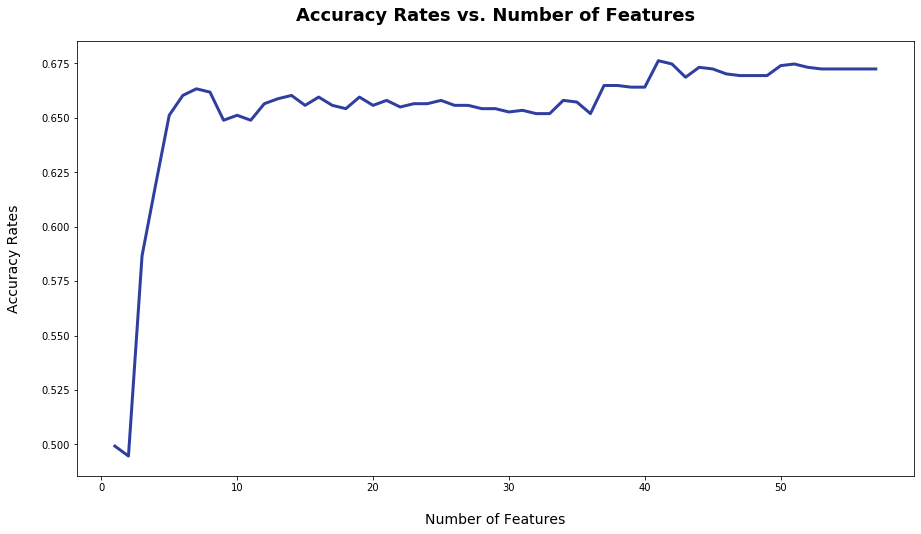

In [12]:
print(acc)

plt.figure(figsize=(15, 8))
plt.title('Accuracy Rates vs. Number of Features', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of Features', fontsize=14, labelpad=20)
plt.ylabel('Accuracy Rates', fontsize=14, labelpad=20)
plt.plot(range(1, len(df.columns) + 1), acc, color='#303F9F', linewidth=3)

plt.show()

In [13]:
n_final = acc.index(max(acc)) + 1

rfe_final = RFE(estimator = logreg, n_features_to_select = n_final, step=1)
rfe_final.fit(X_train, y_train)

y_pred_rfe = rfe_final.predict(X_test)

print(confusion_matrix(y_test,y_pred_rfe))
rfe_logreg_cm = pd.DataFrame(confusion_matrix(y_test,y_pred_rfe), 
                             columns = ['Predicted Negative', 'Predicted Positive'],
                             index = ['Actual Negative', 'Actual Positive'])
confusion_metrics(rfe_logreg_cm)

[[466 219]
 [207 424]]
Accuracy: 0.6763
Sensitivity: 0.6924
Specificity: 0.6594


In [32]:
cols = []
selected = []
rank = []

for i in range(X.shape[1]):
    cols.append(X.columns[i])
    selected.append(rfe_final.support_[i])
    rank.append(rfe_final.ranking_[i])

X_cols = pd.DataFrame(
    {'Columns': cols,
     'Selected': selected,
     'Rank': rank
    })

X_cols

,Columns,Selected,Rank
0,PowerFive,True,1
1,GP,True,1
2,PF,True,1
3,PA,True,1
4,FGPct,True,1
5,FGM,True,1
6,FGA,True,1
7,FG3Pct,True,1
8,FGM3,True,1
9,FGA3,True,1


In [34]:
rfe1_features = X_cols[X_cols['Rank'] == 1]
rfe1_features.reset_index(inplace = True)
rfe1_features

,index,Columns,Selected,Rank
0,0,PowerFive,True,1
1,1,GP,True,1
2,2,PF,True,1
3,3,PA,True,1
4,4,FGPct,True,1
5,5,FGM,True,1
6,6,FGA,True,1
7,7,FG3Pct,True,1
8,8,FGM3,True,1
9,9,FGA3,True,1
